# imports

In [1]:
import numpy as np 
import pandas as pd 
from astropy.table import Table
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
#gpk=sklearn.gaussian_process.kernels
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

# Data load

In [2]:
dat=Table.read('galaxys_sfrs.fits',format='fits')
rates=dat.to_pandas()
display(rates)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.121862e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,3.256150e+07,3.226286e+07,1.037673e+07,4.229310e+07,1.072917e+07,2.173636e+07,2.177563e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.049872e+07,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,8.364835e+08,7.134899e+08,2.646682e+08,1.469355e+08,3.127461e+08,1.608175e+08,2.065014e+08,1.398456e+08,1.727327e+08,1.279627e+08,...,6.435491e+07,5.255915e+07,1.307485e+08,5.973528e+07,7.318712e+07,5.827346e+07,3.088345e+07,6.817811e+07,1.065643e+08,5.396112e+07
129,5.797614e+08,5.734740e+08,3.444549e+08,1.265869e+08,1.250349e+08,6.560139e+07,1.612283e+08,1.132917e+08,2.049056e+08,1.903005e+08,...,1.690854e+07,2.985430e+07,7.517225e+07,1.508655e+07,6.361907e+07,1.365847e+08,5.888099e+07,8.348120e+07,1.317252e+07,7.740073e+07
130,6.618303e+08,5.411283e+08,3.144290e+08,2.548682e+08,2.280316e+08,1.995051e+08,2.277008e+08,9.741332e+07,1.625248e+08,2.029389e+08,...,3.103535e+07,7.165960e+07,8.614169e+07,4.928513e+07,5.599608e+07,3.553955e+07,0.000000e+00,1.375193e+08,1.242353e+08,4.488744e+07
131,7.391168e+08,5.685780e+08,1.960162e+08,1.719007e+08,2.663921e+08,3.025307e+08,8.951291e+07,1.458947e+08,2.812033e+08,9.373020e+07,...,7.905571e+07,1.538903e+07,1.399171e+07,6.229522e+07,1.010944e+08,6.384369e+07,2.981551e+07,9.344312e+07,5.695180e+07,2.857656e+07


# Data reform to ML standard

In [3]:
rates=rates.T
rates.columns=['{0}'.format(i) for i in np.arange(0,13.3,0.1)]
#rates.columns=['t{0}'.format(i) for i in range(133)]

In [4]:
display(rates)

,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9,...,12.3,12.4,12.5,12.600000000000001,12.700000000000001,12.8,12.9,13.0,13.100000000000001,13.200000000000001
0,0.0,0.0,0.0,1.121862e+07,3.256150e+07,1.961643e+08,4.282718e+08,6.812987e+08,1.047628e+09,1.301042e+09,...,7.010921e+08,6.703112e+08,6.019931e+08,6.572833e+08,6.508281e+08,8.364835e+08,5.797614e+08,6.618303e+08,7.391168e+08,7.295124e+08
1,0.0,0.0,0.0,0.000000e+00,3.226286e+07,8.688608e+07,4.121117e+08,7.326325e+08,8.942239e+08,9.280033e+08,...,5.714496e+08,4.735561e+08,6.172117e+08,6.183997e+08,6.126047e+08,7.134899e+08,5.734740e+08,5.411283e+08,5.685780e+08,4.404904e+08
2,0.0,0.0,0.0,0.000000e+00,1.037673e+07,7.635112e+07,1.863183e+08,2.361260e+08,5.173480e+08,4.741350e+08,...,3.494097e+08,3.574252e+08,3.368372e+08,3.416956e+08,4.010380e+08,2.646682e+08,3.444549e+08,3.144290e+08,1.960162e+08,3.356027e+08
3,0.0,0.0,0.0,0.000000e+00,4.229310e+07,6.577377e+07,1.526784e+08,2.366565e+08,3.025478e+08,3.329345e+08,...,1.121076e+08,1.657042e+08,2.821430e+08,3.089876e+08,2.066797e+08,1.469355e+08,1.265869e+08,2.548682e+08,1.719007e+08,2.405086e+08
4,0.0,0.0,0.0,0.000000e+00,1.072917e+07,6.519520e+07,8.725689e+07,2.357612e+08,1.852791e+08,3.250672e+08,...,2.224983e+08,3.133274e+08,1.472774e+08,2.097681e+08,1.761281e+08,3.127461e+08,1.250349e+08,2.280316e+08,2.663921e+08,2.738574e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.000000e+00,0.000000e+00,4.299000e+07,1.105890e+07,5.343203e+07,1.177308e+08,7.441757e+07,...,3.946907e+07,6.484498e+07,4.832985e+07,9.498169e+07,8.601276e+07,5.827346e+07,1.365847e+08,3.553955e+07,6.384369e+07,1.728046e+07
96,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.031075e+07,8.784512e+07,1.050941e+07,1.182076e+08,6.543420e+07,...,7.819751e+07,7.466537e+07,4.157235e+07,4.842295e+07,6.813267e+07,3.088345e+07,5.888099e+07,0.000000e+00,2.981551e+07,7.437630e+07
97,0.0,0.0,0.0,0.000000e+00,1.049872e+07,1.084206e+07,2.131208e+07,9.646283e+07,5.301486e+07,4.423872e+07,...,9.391977e+07,2.822111e+07,4.088621e+07,0.000000e+00,1.093223e+08,6.817811e+07,8.348120e+07,1.375193e+08,9.344312e+07,3.005616e+07
98,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.341961e+07,8.456968e+07,3.261745e+07,...,2.889790e+07,7.832209e+07,1.816080e+07,1.619699e+07,5.521577e+07,1.065643e+08,1.317252e+07,1.242353e+08,5.695180e+07,6.360755e+07


# split data for testing and validating

In [5]:
rates_train,rates_test=train_test_split(rates)
#this randomly reorders rows (galaxies) and defaults 25% to testing/validating

# defining parameters and model

In [6]:
X=np.arange(0,13.3,0.1).reshape(-1,1)

#kernels to trial
kernel0=C(1.0,(1e-3, 1e3))*RBF(1,(1e-2,1e2))
kernel1=C(1.0,(1e-3, 1e3))*RBF(2.5,(1e-2,1e2))
kernel2=C(1.0,(1e-3, 1e3))*RBF(5,(1e-2,1e2))
kernel3=C(1.0,(1e-3, 1e3))*RBF(10,(1e-2,1e2))
kernel4=C(1.0,(1e-3, 1e3))*RBF(15,(1e-2,1e2))

kernels=(kernel0,kernel1,kernel2,kernel3,kernel4)
#other parameters to trial
alphas=(0.1,1,10)

parameters={'kernel':kernels,'alpha':alphas}

gpr=GaussianProcessRegressor(n_restarts_optimizer=9)

gscv=GridSearchCV(gpr,parameters)

# using first (random) galaxy: fitting and scoring

In [7]:
#fitting
gscv.fit(X,rates_train.iloc[0])

/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                                                kernel=None,
                                                n_restarts_optimizer=9,
                                                normalize_y=False,
                                                optimizer='fmin_l_bfgs_b',
                                                random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': (0.1, 1, 10),
                         'kernel': (1**2 * RBF(length_scale=1),
                                    1**2 * RBF(length_scale=2.5),
                                    1**2 * RBF(length_scale=5),
                                    1**2 * RBF(length_scale=10),
                                    1**2 * RBF(length_scale=15))},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
#5 kernels and 3 alphas means 15 combinations
#lol it prints this and then says verbose=0

In [9]:
#scoring
gscv.cv_results_

{'mean_fit_time': array([0.30998778, 0.31103311, 0.29432411, 0.30076108, 0.31539025,
        0.34145555, 0.31909223, 0.3411582 , 0.3296803 , 0.31411214,
        0.30268021, 0.27704153, 0.28929982, 0.28384624, 0.28410039]),
 'std_fit_time': array([0.0252739 , 0.03072412, 0.02962566, 0.03529616, 0.02742038,
        0.04514048, 0.02566894, 0.05495123, 0.05815076, 0.03835923,
        0.03448404, 0.01579779, 0.01113323, 0.00907907, 0.00659287]),
 'mean_score_time': array([0.00081911, 0.000809  , 0.00081563, 0.00082636, 0.00081744,
        0.00084395, 0.00081868, 0.0009994 , 0.00094762, 0.00094738,
        0.00083342, 0.00082603, 0.00084443, 0.00081391, 0.00087514]),
 'std_score_time': array([1.66446907e-05, 9.44017152e-06, 7.73593895e-06, 4.64232260e-05,
        1.75153135e-05, 2.62344520e-05, 6.83791800e-06, 2.29341790e-04,
        1.80865132e-04, 2.03318332e-04, 3.13523967e-05, 2.26909364e-05,
        5.79559032e-05, 8.49037985e-06, 4.14449676e-05]),
 'param_alpha': masked_array(data=[0.1

In [10]:
#we're insterested in the mean_test_score and std_test_score

In [11]:
gscv.best_params_
#says on the tin

{'alpha': 10, 'kernel': 1**2 * RBF(length_scale=2.5)}

In [12]:
gscv.best_estimator_
#it saves the best model (model using the best params)

GaussianProcessRegressor(alpha=10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=2.5),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

# use best model for returning SFR at time t

In [32]:
#sometimes producing negative SFRs
#can pass significant times for SFRs

t0=np.array(0).reshape(-1,1)
sfr0=gscv.best_estimator_.predict(t0)

t1=np.array(2).reshape(-1,1)
sfr1=gscv.best_estimator_.predict(t1)

t2=np.array(2.00005).reshape(-1,1)
sfr2=gscv.best_estimator_.predict(t2)

t3=np.array(10).reshape(-1,1)
sfr3=gscv.best_estimator_.predict(t3)

print(sfr0,sfr1,sfr2,sfr3)


minSFR=min(gscv.best_estimator_.predict(X))
mintrue=min(rates_train.iloc[0])

maxSFR=max(gscv.best_estimator_.predict(X))
maxid=np.argmax(gscv.best_estimator_.predict(X))

t=np.array(maxid+1).reshape(-1,1)
sfr=gscv.best_estimator_.predict(t)

print(minSFR,mintrue,'\n',maxSFR,sfr)

[-12117.32477695] [1.63235421e+08] [1.63210469e+08] [30151854.65382608]
-77509.25143935345 0.0 
 598722977.3207519 [0.]


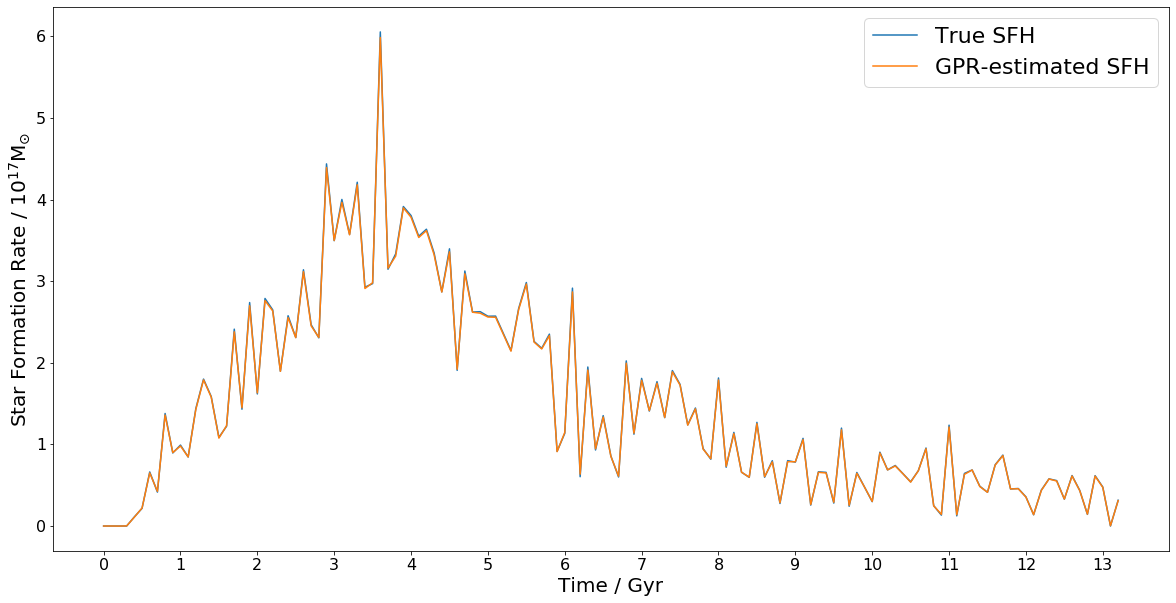

In [27]:
#Compare original SFH to best GPR prediction
plt.figure(figsize=(20,10))
plt.plot(X,rates_train.iloc[0]*1e-8,label='True SFH')
plt.plot(X,gscv.best_estimator_.predict(X)*1e-8,label='GPR-estimated SFH')
plt.legend(fontsize=22)
plt.yticks(fontsize=16)
#reducing the amount of ticks on the X axis (when 133 too cluttered)
plt.xticks(np.arange(min(X),max(X)+0.1,1.0),fontsize=16)
plt.ylabel('Star Formation Rate / $10^{17}\\mathrm{M_{\\odot}}$',fontsize=20)
plt.xlabel('Time / Gyr',fontsize=20)
plt.show()

In [37]:
#correcting negative data 
y=gscv.best_estimator_.predict(X)
for i in y:
    if i<0:
        i=0

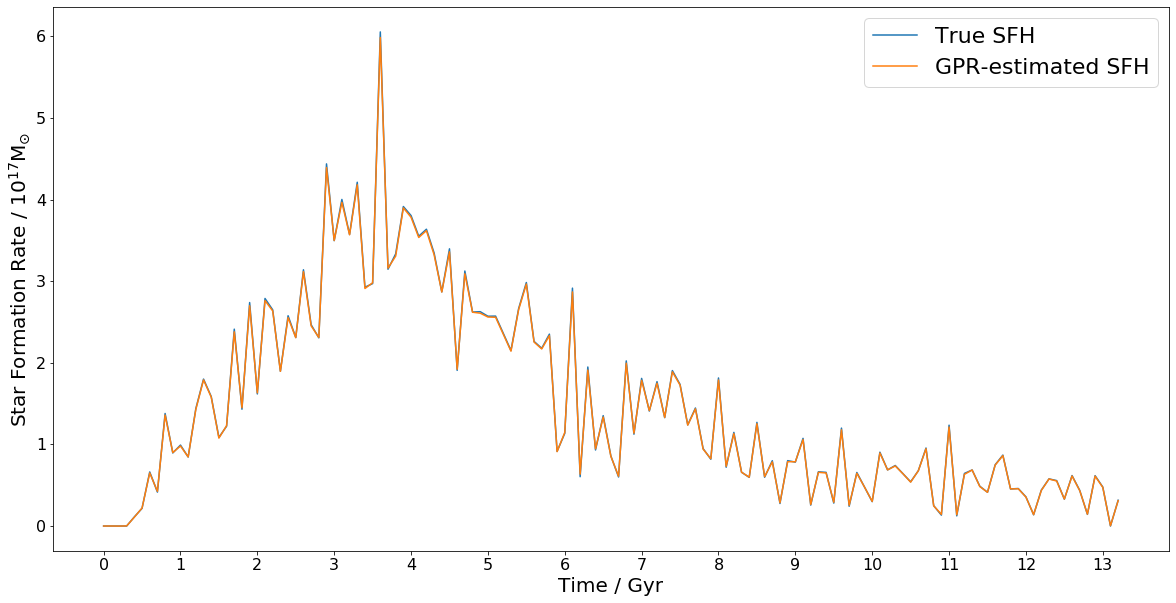

In [38]:
plt.figure(figsize=(20,10))
plt.plot(X,rates_train.iloc[0]*1e-8,label='True SFH')
plt.plot(X,y*1e-8,label='GPR-estimated SFH')
plt.legend(fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(np.arange(min(X),max(X)+0.1,1.0),fontsize=16)
plt.ylabel('Star Formation Rate / $10^{17}\\mathrm{M_{\\odot}}$',fontsize=20)
plt.xlabel('Time / Gyr',fontsize=20)
plt.show()